# **Roll:** 2003107

**Name:** Md. Asif Sajeed

**Section:** B

**Dept:** CSE-20

The Data has been taken from: https://www.worldometers.info/world-population/indonesia-population/

In [1]:
import pandas as pd
import csv
import math
import numpy as np
import matplotlib.pyplot as plt

# Open CSV file
file = open("data.csv")
type(file)

years = []
populations = []

with open('data.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter = ',')
  next(reader)
  for row in reader:
    year,population = row
    years.append(int(year))
    populations.append(int(population.replace(',', '')))

In [2]:
# Problem 1: Newton's Interpolation

def print_forward(forward_diff):
  for index in forward_diff:
    for element in index:
      print(element, end=' ')
    print('\n')

def u_cal(u, n):
  tmp = u;
  for i in range(1, n):
    tmp = tmp * (u-i)
  return tmp

def Newtons_Forward(x, y, xi):
  n = len(x)
  h = x[1] - x[0]
  forward_diff = [y]
  # Difference Table
  for i in range(1,n):
    next_diff = []
    for j in range(n-i):
      next_diff.append(forward_diff[i-1][j+1] - forward_diff[i-1][j])
    forward_diff.append(next_diff)
  # Display the Difference Table
  df = pd.DataFrame(forward_diff).transpose()
  df.index = x
  df.columns = [f'D{n}' for n in range(n)]

  # Calculation
  result = y[0]
  u = (xi - x[0])/h
  for i in range(1, n):
    result+= (u_cal(u, i) * forward_diff[i][0] / math.factorial(i))

  return result, df

x = years
y = populations

xi = 2013

interpolated_value, difference_table = Newtons_Forward(x, y, xi)
print('Forward Difference Table: ')
print(difference_table)
print('Predicted population for the year ', xi, 'is: ', round(interpolated_value))


Forward Difference Table: 
               D0          D1         D2         D3         D4         D5  \
1955   77741502.0  10641379.0  2133608.0  -838069.0  1456825.0 -3010816.0   
1960   88382881.0  12774987.0  1295539.0   618756.0 -1553991.0  2160883.0   
1965  101157868.0  14070526.0  1914295.0  -935235.0   606892.0 -2175684.0   
1970  115228394.0  15984821.0   979060.0  -328343.0 -1568792.0  4324453.0   
1975  131213215.0  16963881.0   650717.0 -1897135.0  2755661.0 -3274324.0   
1980  148177096.0  17614598.0 -1246418.0   858526.0  -518663.0  -972707.0   
1985  165791694.0  16368180.0  -387892.0   339863.0 -1491370.0  4320719.0   
1990  182159874.0  15980288.0   -48029.0 -1151507.0  2829349.0 -5120729.0   
1995  198140162.0  15932259.0 -1199536.0  1677842.0 -2291380.0   730353.0   
2000  214072421.0  14732723.0   478306.0  -613538.0 -1561027.0        NaN   
2005  228805144.0  15211029.0  -135232.0 -2174565.0        NaN        NaN   
2010  244016173.0  15075797.0 -2309797.0        N

In [3]:
# Problem 2: Newton-Raphson Method of Root Finding

def newton_raphson(func, func_derivative, x0, tol=1e-10, max_it = 100):
  x = x0
  it_count = 0
  while it_count < max_it:
    f_x = func(x)
    f_prime_x = func_derivative(x)
    if abs(f_x)<tol:
      return x, it_count
    if f_prime_x == 0:
      return None, it_count
    x = x - f_x / f_prime_x
    it_count += 1
  return None, it_count

# Let the Target Population be 300 000 000
# And the Rate of Growth Function is y = 1240*x^2 - 2e6*x - 1e9
# The Current Population of London is 271 857 970
# The Required Population Growth = (300000000 - 271857970) = 29 142 030

def poly_function(x):
  return 1240*x**2 - 1.0005*2e6*x - 1.1*1e9
def poly_function_derivative(x):
  return 2480*x - 1.0005*2e6

target_population = 300000000

root, iterations = newton_raphson(poly_function, poly_function_derivative, target_population)

if root is not None:
  print(f'Root Found after', iterations, 'iterations.')
  print(f"The Year when the population is expected to reach 30 Million: {root:.2f}")
else:
  print("Failed to find the root.")


Root Found after 23 iterations.
The Year when the population is expected to reach 30 Million: 2047.06


Predicted Population for Year 2013 is: 252437565


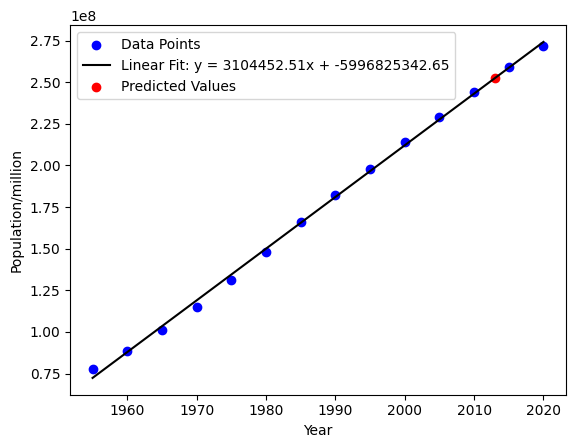

In [4]:
# Problem 3: Linear Curve Fitting and Predicting Population

def linear_least_squares(x, y):
  x = np.array(x, dtype=np.float64)
  y = np.array(y, dtype=np.float64)
  n = len(x)
  
  sum_x = np.sum(x)
  sum_y = np.sum(y)
  sum_xy = np.sum(x*y)
  sum_x_sq = np.sum(x**2)
  
  # Calculate slope (m) and intercept (b) with overflow checks
  denominator = (n * sum_x_sq - sum_x**2)
  if np.abs(denominator) < 1e-10:
    raise ValueError("Denominator too small, potential division by zero.")
  
  m = (n * sum_xy - sum_x * sum_y) / denominator
  b = (sum_y - m * sum_x) / n
  
  return m, b

def predicted_values(x, m, b):
  x = np.array(x)
  y_predicted = m*x + b
  return y_predicted

def plot_linear_fit(x, y, m, b, x_predict, y_predict):
  x = np.array(x)
  plt.scatter(x, y, label='Data Points', color='blue')
  plt.plot(x, (m*x + b), color='black', label=f'Linear Fit: y = {m:.2f}x + {b:.2f}')
  plt.scatter(x_predict, y_predict, color = 'r', label='Predicted Values')
  plt.xlabel('Year')
  plt.ylabel('Population/million')
  plt.legend()
  plt.show()

x_data = years
y_data = populations

m,b = linear_least_squares(x_data, y_data)

x_predict = 2013
y_predict = round(predicted_values(x_predict, m, b))
print(f'Predicted Population for Year {x_predict} is: {y_predict}')

plot_linear_fit(x_data, y_data, m, b, x_predict, y_predict)


Root Found after 23 iterations.
The Year when the population is expected to reach 30 Million: 2047.06
Predicted Population for Year 2013 is: 252437565


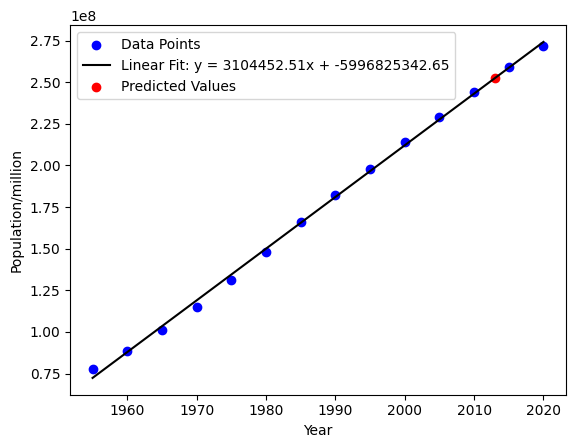

Interpolated population for the year 2021 is: 269950975
Root Found after iterations.
The Year when the population is expected to reach 300000000: 2047.06
Predicted Population for Year 2021 is: 277273185


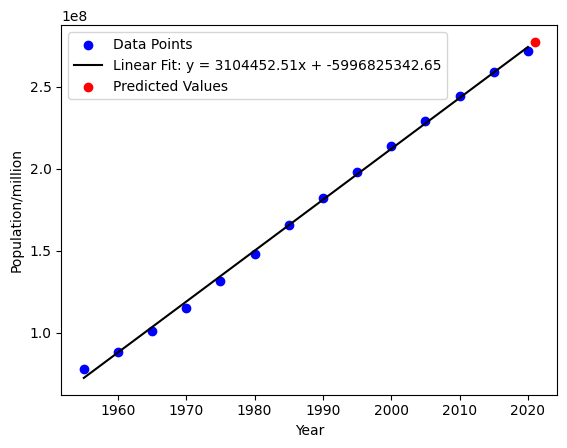

Integrated Prediction for Year 2021 is: 182408736
Predicted Population for Year 2021 is: 277273185
Interpolated population for the year 2022 is: 260454489
Root Found after iterations.
The Year when the population is expected to reach 300000000: 2047.06
Predicted Population for Year 2022 is: 280377638


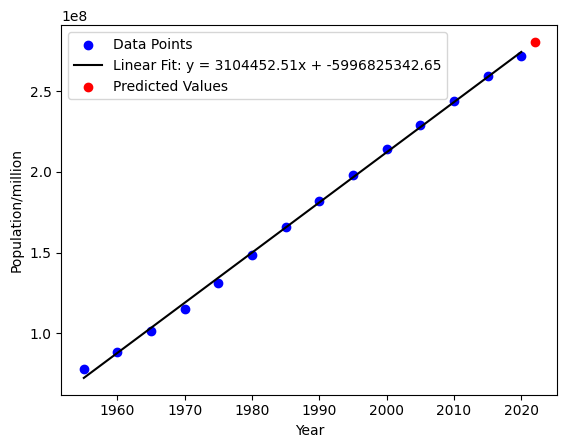

Integrated Prediction for Year 2022 is: 180278058
Predicted Population for Year 2022 is: 280377638
Interpolated population for the year 2023 is: 235621404
Root Found after iterations.
The Year when the population is expected to reach 300000000: 2047.06
Predicted Population for Year 2023 is: 283482090


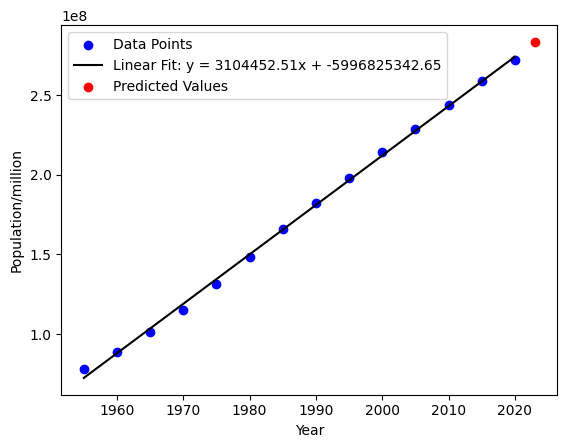

Integrated Prediction for Year 2023 is: 173035180
Predicted Population for Year 2023 is: 283482090
Interpolated population for the year 2024 is: 182173093
Root Found after iterations.
The Year when the population is expected to reach 300000000: 2047.06
Predicted Population for Year 2024 is: 286586543


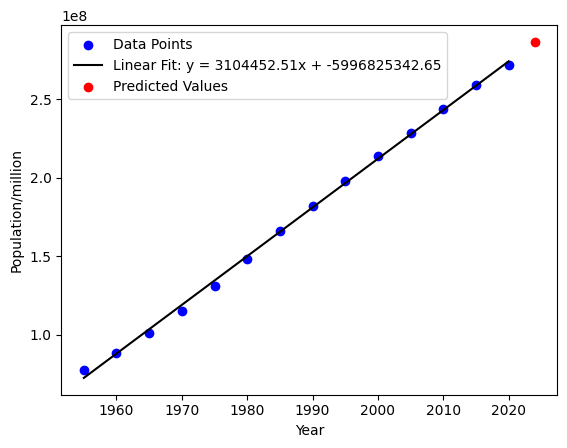

Integrated Prediction for Year 2024 is: 156253894
Predicted Population for Year 2024 is: 286586543
Interpolated population for the year 2025 is: 78397217
Root Found after iterations.
The Year when the population is expected to reach 300000000: 2047.06
Predicted Population for Year 2025 is: 289690995


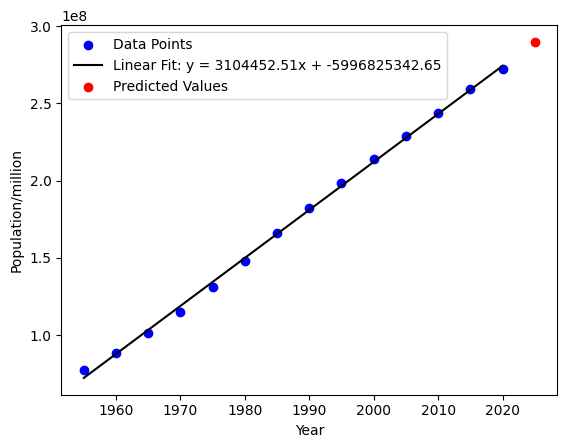

Integrated Prediction for Year 2025 is: 122696753
Predicted Population for Year 2025 is: 289690995
Interpolated population for the year 2026 is: -109907328
Root Found after iterations.
The Year when the population is expected to reach 300000000: 2047.06
Predicted Population for Year 2026 is: 292795448


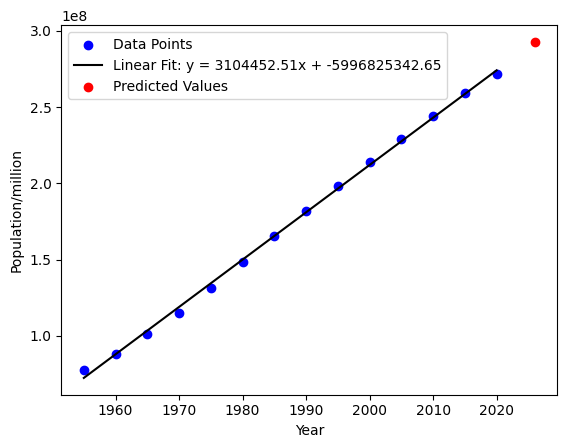

Integrated Prediction for Year 2026 is: 60963389
Predicted Population for Year 2026 is: 292795448
Interpolated population for the year 2027 is: -434989988
Root Found after iterations.
The Year when the population is expected to reach 300000000: 2047.06
Predicted Population for Year 2027 is: 295899900


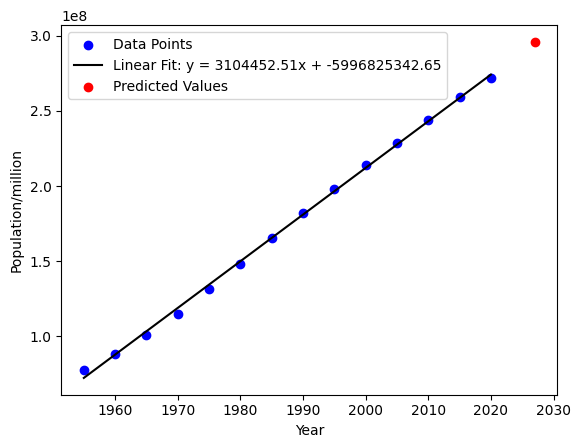

Integrated Prediction for Year 2027 is: -46362680
Predicted Population for Year 2027 is: 295899900
Interpolated population for the year 2028 is: -974646738
Root Found after iterations.
The Year when the population is expected to reach 300000000: 2047.06
Predicted Population for Year 2028 is: 299004353


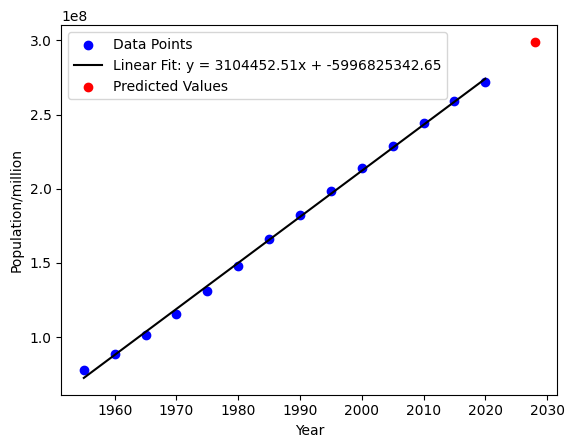

Integrated Prediction for Year 2028 is: -225213446
Predicted Population for Year 2028 is: 299004353
Interpolated population for the year 2029 is: -1842188109
Root Found after iterations.
The Year when the population is expected to reach 300000000: 2047.06
Predicted Population for Year 2029 is: 302108805


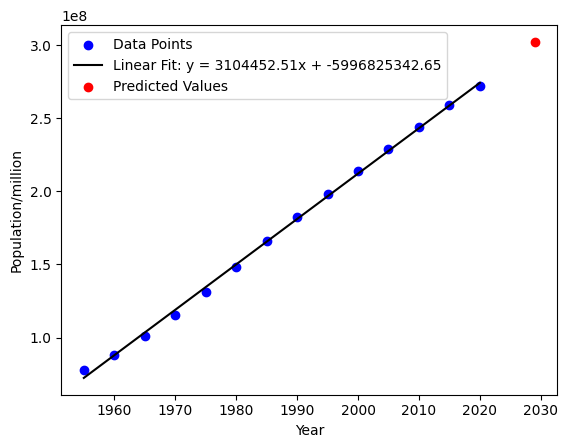

Integrated Prediction for Year 2029 is: -513359086
Predicted Population for Year 2029 is: 302108805
Interpolated population for the year 2030 is: -3199521969
Root Found after iterations.
The Year when the population is expected to reach 300000000: 2047.06
Predicted Population for Year 2030 is: 305213258


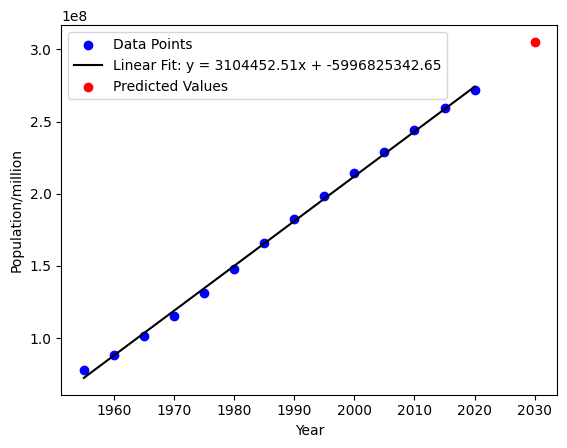

Integrated Prediction for Year 2030 is: -964768888
Predicted Population for Year 2030 is: 305213258

Predictions for the next 10 years:
   Year  Interpolation      Raphson  Linear Fitting  Integrated
0  2021   2.699510e+08  2047.061074    2.772732e+08   182408736
1  2022   2.604545e+08  2047.061074    2.803776e+08   180278058
2  2023   2.356214e+08  2047.061074    2.834821e+08   173035180
3  2024   1.821731e+08  2047.061074    2.865865e+08   156253894
4  2025   7.839722e+07  2047.061074    2.896910e+08   122696753
5  2026  -1.099073e+08  2047.061074    2.927954e+08    60963389
6  2027  -4.349900e+08  2047.061074    2.958999e+08   -46362680
7  2028  -9.746467e+08  2047.061074    2.990044e+08  -225213446
8  2029  -1.842188e+09  2047.061074    3.021088e+08  -513359086
9  2030  -3.199522e+09  2047.061074    3.052133e+08  -964768888


In [5]:
import pandas as pd
import csv
import math
import numpy as np
import matplotlib.pyplot as plt

# Open CSV file
file = open("data.csv")
type(file)

years = []
populations = []

with open('data.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        year, population = row
        years.append(int(year))
        populations.append(int(population.replace(',', '')))

# Problem 1: Newton's Interpolation
def print_forward(forward_diff):
    for index in forward_diff:
        for element in index:
            print(element, end=' ')
        print('\n')

def u_cal(u, n):
    tmp = u
    for i in range(1, n):
        tmp = tmp * (u - i)
    return tmp

def Newtons_Forward(x, y, xi):
    n = len(x)
    h = x[1] - x[0]
    forward_diff = [y]
    # Difference Table
    for i in range(1, n):
        next_diff = []
        for j in range(n - i):
            next_diff.append(forward_diff[i - 1][j + 1] - forward_diff[i - 1][j])
        forward_diff.append(next_diff)
    # Display the Difference Table
    df = pd.DataFrame(forward_diff).transpose()
    df.index = x
    df.columns = [f'D{n}' for n in range(n)]

    # Calculation
    result = y[0]
    u = (xi - x[0]) / h
    for i in range(1, n):
        result += (u_cal(u, i) * forward_diff[i][0] / math.factorial(i))

    return result, df

# Problem 2: Newton-Raphson Method of Root Finding
def newton_raphson(func, func_derivative, x0, tol=1e-10, max_it=100):
    x = x0
    it_count = 0
    while it_count < max_it:
        f_x = func(x)
        f_prime_x = func_derivative(x)
        if abs(f_x) < tol:
            return x, it_count
        if f_prime_x == 0:
            return None, it_count
        x = x - f_x / f_prime_x
        it_count += 1
    return None, it_count

# Let the Target Population be 300 000 000
# And the Rate of Growth Function is y = 1240*x^2 - 2e6*x - 1e9
# The Current Population of London is 271 857 970
# The Required Population Growth = (300000000 - 271857970) = 29 142 030

def poly_function(x):
    return 1240 * x ** 2 - 1.0005 * 2e6 * x - 1.1 * 1e9

def poly_function_derivative(x):
    return 2480 * x - 1.0005 * 2e6

target_population = 300000000

root, iterations = newton_raphson(poly_function, poly_function_derivative, target_population)

if root is not None:
    print(f'Root Found after', iterations, 'iterations.')
    print(f"The Year when the population is expected to reach 30 Million: {root:.2f}")
else:
    print("Failed to find the root.")

# Problem 3: Linear Curve Fitting and Predicting Population
def linear_least_squares(x, y):
    x = np.array(x, dtype=np.float64)
    y = np.array(y, dtype=np.float64)
    n = len(x)
    
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x*y)
    sum_x_sq = np.sum(x**2)
    
    denominator = (n * sum_x_sq - sum_x**2)
    if np.abs(denominator) < 1e-10:
        raise ValueError("Denominator too small, potential division by zero.")
    
    m = (n * sum_xy - sum_x * sum_y) / denominator
    b = (sum_y - m * sum_x) / n
    
    return m, b

def predicted_values(x, m, b):
    x = np.array(x)
    y_predicted = m * x + b
    return y_predicted

def plot_linear_fit(x, y, m, b, x_predict, y_predict):
    x = np.array(x)
    plt.scatter(x, y, label='Data Points', color='blue')
    plt.plot(x, (m * x + b), color='black', label=f'Linear Fit: y = {m:.2f}x + {b:.2f}')
    plt.scatter(x_predict, y_predict, color='r', label='Predicted Values')
    plt.xlabel('Year')
    plt.ylabel('Population/million')
    plt.legend()
    plt.show()

x_data = years
y_data = populations

m, b = linear_least_squares(x_data, y_data)

x_predict = 2013
y_predict = round(predicted_values(x_predict, m, b))
print(f'Predicted Population for Year {x_predict} is: {y_predict}')

plot_linear_fit(x_data, y_data, m, b, x_predict, y_predict)

# Part 4: Integrated Prediction

def integrated_prediction_model(x, y, target_year, target_population):
    interpolated_value, _ = Newtons_Forward(x, y, target_year)
    print(f'Interpolated population for the year {target_year} is: {round(interpolated_value)}')

    root, _ = newton_raphson(poly_function, poly_function_derivative, target_population)

    if root is not None:
        print(f'Root Found after iterations.')
        print(f"The Year when the population is expected to reach {target_population}: {root:.2f}")
    else:
        print("Failed to find the root.")

    y_predict = round(predicted_values(target_year, m, b))
    print(f'Predicted Population for Year {target_year} is: {y_predict}')

    plot_linear_fit(x, y, m, b, target_year, y_predict)

    integrated_prediction = (interpolated_value + root + y_predict) / 3
    print(f'Integrated Prediction for Year {target_year} is: {round(integrated_prediction)}')
    print(f'Predicted Population for Year {target_year} is: {y_predict}')

# Predict population for the next 10 years
def predict_next_10_years(x, y, target_population):
    predictions = {'Year': [], 'Interpolation': [], 'Raphson': [], 'Linear Fitting': [], 'Integrated': []}

    for year in range(max(x) + 1, max(x) + 11):
        integrated_prediction_model(x, y, year, target_population)


        predictions['Year'].append(year)
        predictions['Interpolation'].append(Newtons_Forward(x, y, year)[0])
        predictions['Raphson'].append(newton_raphson(poly_function, poly_function_derivative, target_population)[0])
        predictions['Linear Fitting'].append(predicted_values(year, m, b))

        interpolated_value, _ = Newtons_Forward(x, y, year)
        root, _ = newton_raphson(poly_function, poly_function_derivative, target_population)
        y_predict = round(predicted_values(year, m, b))

        # Combine Predictions
        integrated_prediction = (interpolated_value + root + y_predict) / 3
        predictions['Integrated'].append(round(integrated_prediction))

    # Display predictions in tabular format
    predictions_df = pd.DataFrame(predictions)
    print('\nPredictions for the next 10 years:')
    print(predictions_df)

target_population = 300000000

predict_next_10_years(years, populations, target_population)